In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/raw/card.csv',
               encoding='latin-1')
df

,match_id,id,subtype,event_incident_typefk,elapsed,elapsed_plus,del,goal_type,card_type,player1,team
0,489042,379481,serious_fouls,73,78,NaN,NaN,NaN,y,24157,10260.0
1,489042,379503,serious_fouls,73,82,NaN,NaN,NaN,y,30362,10260.0
2,489042,379547,NaN,70,90,NaN,NaN,NaN,y,30829,10260.0
3,489044,377978,serious_fouls,73,56,NaN,NaN,NaN,y,37442,8650.0
4,489044,378060,stall_time,25,90,NaN,NaN,NaN,y,46621,8650.0
...,...,...,...,...,...,...,...,...,...,...,...
62109,1992228,5640034,NaN,70,82,NaN,NaN,NaN,y,25815,10192.0
62110,1992229,5639986,NaN,70,52,NaN,NaN,NaN,y,198082,10243.0
62111,1992229,5639991,NaN,70,56,NaN,NaN,NaN,y,121080,10243.0
62112,1992229,5639996,NaN,70,60,NaN,NaN,NaN,y,214344,9824.0


In [3]:
df.dtypes

match_id                   int64
id                         int64
subtype                   object
event_incident_typefk      int64
elapsed                    int64
elapsed_plus             float64
del                      float64
goal_type                 object
card_type                 object
player1                   object
team                     float64
dtype: object

In [4]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [5]:
df.describe()

,match_id,id,event_incident_typefk,elapsed,elapsed_plus,del,team
count,62114.00,62114.00,62114.00,62114.00,3482.00,322.00,61794.00
mean,1271363.98,2674654.09,111.14,56.78,2.63,1.00,9552.13
std,496635.94,1548247.12,119.80,24.07,1.52,0.00,9150.50
min,489042.00,375310.00,25.00,1.00,1.00,1.00,1601.00
25%,857073.00,1327706.75,70.00,38.00,1.00,1.00,8529.00
50%,1239714.50,2520207.00,70.00,59.00,2.00,1.00,8661.00
75%,1724286.75,3995712.75,73.00,78.00,4.00,1.00,9875.00
max,2118418.00,5640034.00,643.00,92.00,10.00,1.00,208931.00


In [6]:
simple_profile = df.describe(include='all')
simple_profile

,match_id,id,subtype,event_incident_typefk,elapsed,elapsed_plus,del,goal_type,card_type,player1,team
count,62114.00,62114.00,18864,62114.00,62114.00,3482.00,322.00,1,61509,61794,61794.00
unique,NaN,NaN,13,NaN,NaN,NaN,NaN,1,3,5865,NaN
top,NaN,NaN,serious_fouls,NaN,NaN,NaN,NaN,p,y,30962,NaN
freq,NaN,NaN,7680,NaN,NaN,NaN,NaN,1,58045,100,NaN
mean,1271363.98,2674654.09,NaN,111.14,56.78,2.63,1.00,NaN,NaN,NaN,9552.13
std,496635.94,1548247.12,NaN,119.80,24.07,1.52,0.00,NaN,NaN,NaN,9150.50
min,489042.00,375310.00,NaN,25.00,1.00,1.00,1.00,NaN,NaN,NaN,1601.00
25%,857073.00,1327706.75,NaN,70.00,38.00,1.00,1.00,NaN,NaN,NaN,8529.00
50%,1239714.50,2520207.00,NaN,70.00,59.00,2.00,1.00,NaN,NaN,NaN,8661.00
75%,1724286.75,3995712.75,NaN,73.00,78.00,4.00,1.00,NaN,NaN,NaN,9875.00


In [7]:
profile = ProfileReport(df, title="Export Data Profiling Report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def get_basic_profile(dataframe):
    quantile_range = 0.5
    results = {}
    
    for column in dataframe.columns:
        count = df[column].count()
        nans = df[column].isna().sum()
        min = df[column].min()
        max = df[column].max()
        median = df[column].median()
        std = df[column].std()
        kurt = df[column].kurt()
        skew = df[column].skew()
        quant = df[column].quantile(q=quantile_range)
        
        results[column] = {'count': count,
                            'count_na': nans,
                            'min':min,
                            'max':max,
                            'median':median,
                            'std':std,
                            'kurt':kurt,
                            'skew':skew,
                            'quant {quantile_range}':quant}
 
    return results

In [10]:
num_columns = df.select_dtypes(include=['int64','float64'])
basic_profile = get_basic_profile(num_columns)
basic_profile

{'match_id': {'count': 62114,
  'count_na': 0,
  'min': 489042,
  'max': 2118418,
  'median': 1239714.5,
  'std': 496635.9447339636,
  'kurt': -1.257192895774618,
  'skew': 0.06750359257774795,
  'quant {quantile_range}': 1239714.5},
 'id': {'count': 62114,
  'count_na': 0,
  'min': 375310,
  'max': 5640034,
  'median': 2520207.0,
  'std': 1548247.1182827898,
  'kurt': -1.1249621646889525,
  'skew': 0.2927356438256887,
  'quant {quantile_range}': 2520207.0},
 'event_incident_typefk': {'count': 62114,
  'count_na': 0,
  'min': 25,
  'max': 643,
  'median': 70.0,
  'std': 119.79752848310818,
  'kurt': 7.30970868472445,
  'skew': 2.911314126165272,
  'quant {quantile_range}': 70.0},
 'elapsed': {'count': 62114,
  'count_na': 0,
  'min': 1,
  'max': 92,
  'median': 59.0,
  'std': 24.073849448958573,
  'kurt': -0.9983034190670552,
  'skew': -0.3044901724373455,
  'quant {quantile_range}': 59.0},
 'elapsed_plus': {'count': 3482,
  'count_na': 58632,
  'min': 1.0,
  'max': 10.0,
  'median': 2

Text(0.5, 1.0, 'Cards count')

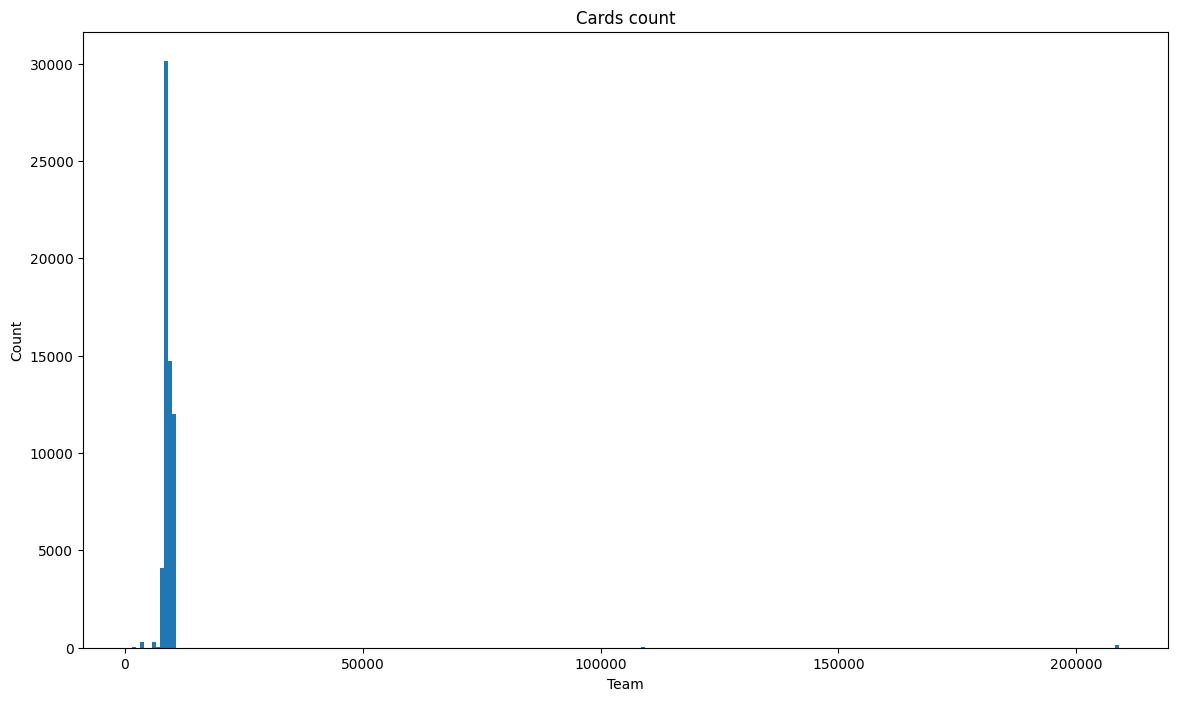

In [11]:
# square root choice
bins = int(np.ceil(np.sqrt(len(num_columns['team']))))
 
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.hist(num_columns['team'], bins)
 
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Team')
ax.set_ylabel('Count')
ax.set_title(r'Cards count')
# plt.savefig("mygraph.jpg")